In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

train_file = "./adult-training.csv"
#test_file = "/home/tejakummarikuntla/Dev/EDA/Salary_Prediction/us-census-data/adult-test.csv"

columns = ['Age','Workclass','fnlgwt','Education','Education_num','Marital_Status',
           'Occupation','Relationship','Race','Sex','Capital_Gain','Capital_Loss',
           'Hours/Week','Native_country','Income']

In [3]:
train = pd.read_csv(train_file, names=columns)
train.head()

,Age,Workclass,fnlgwt,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours/Week,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## People from which Age group are having majority >50K?

     Income
Age        
30      171
29      134
28      119
27       81
26       63
25       53
24       31
22       13
23       12
21        3
19        2


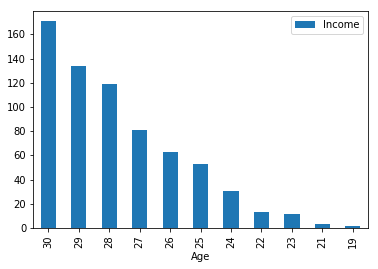

In [4]:
ag_30 = train[(train.Income == ' >50K') & (train.Age <= 30)].pivot_table(values='Income',
                                                                 index='Age', 
                                                                 aggfunc='count').sort_values(by='Income', ascending=False)
print(ag_30)
ag_30.plot(kind='bar')

     Income
Age        
46      292
37      292
45      288
47      288
38      282
44      281
41      279
39      278
43      273
42      270
40      268
36      263
50      261
34      243
51      242
35      217
48      217
49      206
52      192
33      191
32      189
53      189
31      183
54      173
30      171
55      146
59      133
57      131
58      122
56      118
60      101


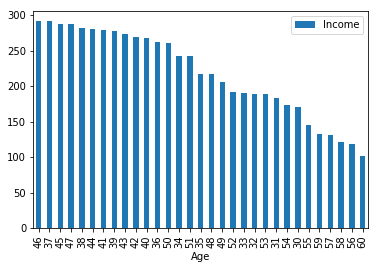

In [5]:
ag_30_60 = train[(train.Income == ' >50K') & (train.Age >= 30) & (train.Age <= 60)].pivot_table(values='Income',
                                                                                     index='Age',
                                                                                     aggfunc='count').sort_values(by='Income', ascending=False)
print(ag_30_60)
ag_30_60.plot(kind='bar')

     Income
Age        
60      101
61       96
62       67
63       59
64       53
65       43
67       37
66       35
68       27
69       21
70       19
71       16
74       12
73       10
79        9
72        9
90        8
75        7
76        5
77        5
78        5
81        3
80        2
83        2
84        1


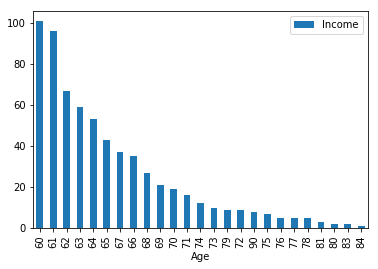

In [6]:
ag_60_90 = train[(train.Income == ' >50K') & (train.Age >= 60) & (train.Age <= 90)].pivot_table(values='Income', 
                                                                                     index='Age', 
                                                                                     aggfunc='count').sort_values(by='Income', ascending=False)
print(ag_60_90)
ag_60_90.plot(kind='bar')

### Report: Peple from age group `[30-60]` are more in #>50K Income

## People in which Education Field are having more #>50K Income?

               Income
Education            
 Bachelors       2221
 HS-grad         1675
 Some-college    1387
 Masters          959
 Prof-school      423
 Assoc-voc        361
 Doctorate        306
 Assoc-acdm       265
 10th              62
 11th              60
 7th-8th           40
 12th              33
 9th               27
 5th-6th           16
 1st-4th            6


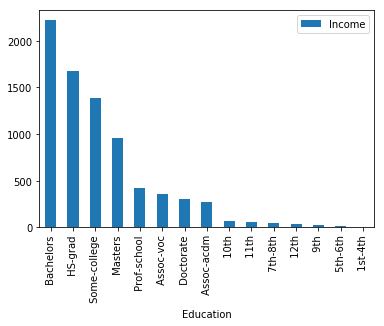

In [7]:
gt_50k_edu = train[(train.Income == ' >50K')].pivot_table(values='Income', index='Education',aggfunc='count').sort_values(by='Income', ascending=False)
print(gt_50k_edu)
gt_50k_edu.plot(kind='bar')

               Income
Education            
 Bachelors       2221
 HS-grad         1675
 Some-college    1387
 Masters          959
 Prof-school      423
 Assoc-voc        361
 Doctorate        306
 Assoc-acdm       265
 10th              62
 11th              60
 7th-8th           40
 12th              33
 9th               27
 5th-6th           16
 1st-4th            6


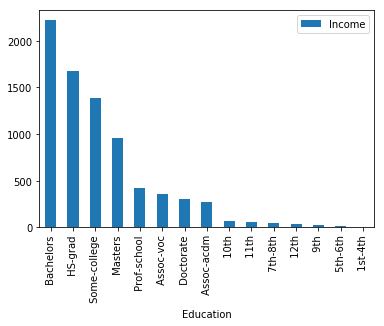

In [8]:
lt_50k_edu = train[(train.Income == ' >50K')].pivot_table(values='Income', index='Education',aggfunc='count').sort_values(by='Income', ascending=False)
print(lt_50k_edu)
lt_50k_edu.plot(kind='bar')

### Report: People from Bachlors are more in # >50K and <=50K Income

## Men in which working class earns more #>50K and <=50K

                   Income
Workclass                
 Private             4237
 Self-emp-not-inc     642
 Self-emp-inc         581
 Local-gov            463
 Federal-gov          315
 State-gov            285
 ?                    139


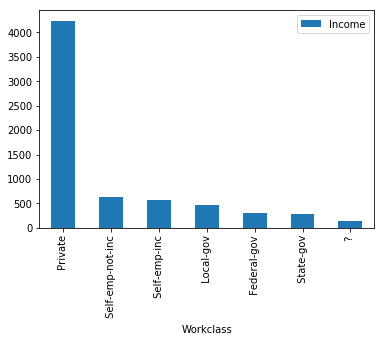

In [9]:
# Men with Income >50K [Workclass]
wrk_men = train[(train.Income == ' >50K') & (train.Sex == ' Male')].pivot_table(values='Income', index='Workclass',aggfunc='count').sort_values(by='Income', ascending=False)
print(wrk_men)
wrk_men.plot(kind='bar')

                   Income
Workclass                
 Private            10707
 Self-emp-not-inc    1500
 ?                    858
 Local-gov            795
 State-gov            524
 Self-emp-inc         400
 Federal-gov          330
 Without-pay            9
 Never-worked           5


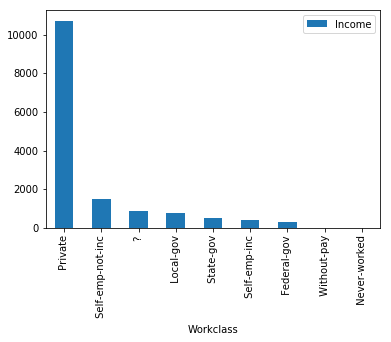

In [10]:
# Men with Income <=50K [Workclass]
wrk_men_lt = train[(train.Income == ' <=50K') & (train.Sex == ' Male')].pivot_table(values='Income', index='Workclass',aggfunc='count').sort_values(by='Income', ascending=False)
print(wrk_men_lt)
wrk_men_lt.plot(kind='bar')

### Report: Men in Private working class has more #>50K and <=50K

## Women in which working class earns more #>50K and <=50K

                   Income
Workclass                
 Private              726
 Local-gov            154
 Self-emp-not-inc      82
 State-gov             68
 Federal-gov           56
 ?                     52
 Self-emp-inc          41


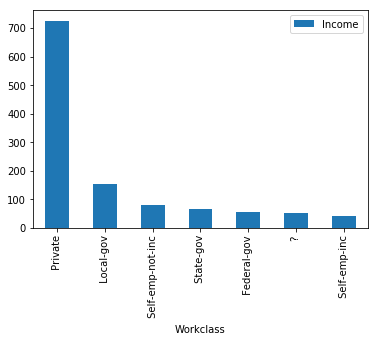

In [13]:
# Women with Income >50K [Workclass]
wrk_men = train[(train.Income == ' >50K') & (train.Sex == ' Female')].pivot_table(values='Income', index='Workclass',aggfunc='count').sort_values(by='Income', ascending=False)
print(wrk_men)
wrk_men.plot(kind='bar')

                   Income
Workclass                
 Private             7026
 ?                    787
 Local-gov            681
 State-gov            421
 Self-emp-not-inc     317
 Federal-gov          259
 Self-emp-inc          94
 Without-pay            5
 Never-worked           2


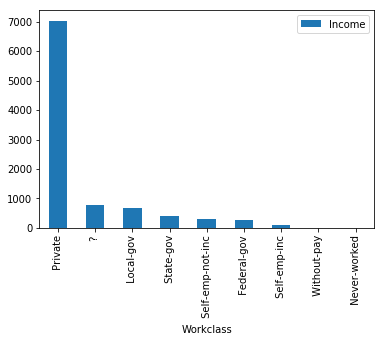

In [12]:
# Women with Income <=50K [Workclass]
wrk_men_lt = train[(train.Income == ' <=50K') & (train.Sex == ' Female')].pivot_table(values='Income', index='Workclass',aggfunc='count').sort_values(by='Income', ascending=False)
print(wrk_men_lt)
wrk_men_lt.plot(kind='bar')

### Report: Women in Private working class has more #>50K and <=50K

## What is the Majority Race and Minority Race

                       Age  Capital_Gain  Capital_Loss  Education  \
Race                                                                
 White               27816         27816         27816      27816   
 Other                 271           271           271        271   
 Black                3124          3124          3124       3124   
 Asian-Pac-Islander   1039          1039          1039       1039   
 Amer-Indian-Eskimo    311           311           311        311   

                     Education_num  Hours/Week  Income  Marital_Status  \
Race                                                                     
 White                       27816       27816   27816           27816   
 Other                         271         271     271             271   
 Black                        3124        3124    3124            3124   
 Asian-Pac-Islander           1039        1039    1039            1039   
 Amer-Indian-Eskimo            311         311     311             311  

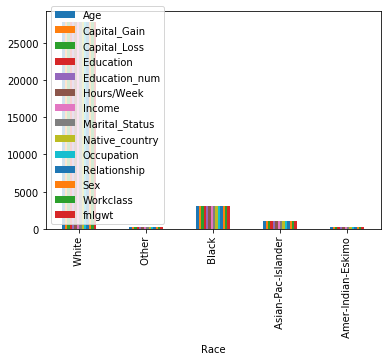

In [21]:
rc = train.pivot_table(index='Race', aggfunc='count').sort_values(by='Race', ascending=False)
print(rc)
rc.plot(kind='bar')

### Report: Majority Race `White`, Minority Race `Amer-Indian-Eskimo`

## Which Race is having more #>50K and more #<=50K?

                     Income
Race                       
 White                 7117
 Black                  387
 Asian-Pac-Islander     276
 Amer-Indian-Eskimo      36
 Other                   25


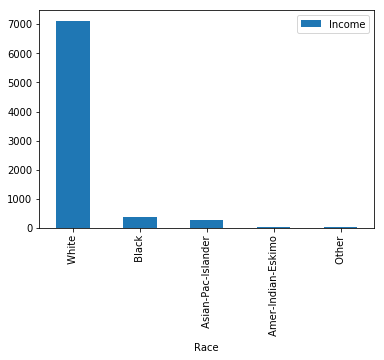

In [22]:
# Races with Income >50K 
rc_income = train[(train.Income == ' >50K')].pivot_table(values='Income', index='Race',aggfunc='count').sort_values(by='Income', ascending=False)
print(rc_income)
rc_income.plot(kind='bar')

                     Income
Race                       
 White                20699
 Black                 2737
 Asian-Pac-Islander     763
 Amer-Indian-Eskimo     275
 Other                  246


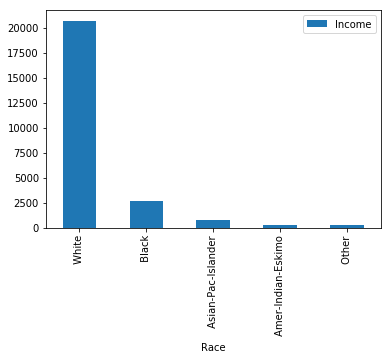

In [23]:
# Races with Income <=50K 
rc_income = train[(train.Income == ' <=50K')].pivot_table(values='Income', index='Race',aggfunc='count').sort_values(by='Income', ascending=False)
print(rc_income)
rc_income.plot(kind='bar')

### Report: White Race is having more #>50K and more #<=50K. But, compering black, there are more #Black race in <=50K than >50K

## Which country Education has the more #>50K?

In [37]:
con_gt_50K = train[train.Income == ' >50K'].pivot_table(index=['Native_country', 'Education'], values='Income', aggfunc='count').sort_values(by='Income', ascending=False)
print(con_gt_50K)

                              Income
Native_country Education            
 United-States  Bachelors       2016
                HS-grad         1583
                Some-college    1298
                Masters          866
                Prof-school      374
                Assoc-voc        336
                Doctorate        249
                Assoc-acdm       247
                10th              59
                11th              55
 ?              Bachelors         52
 Philippines    Bachelors         36
 United-States  7th-8th           31
                12th              28
                9th               23
 ?              Masters           23
                Some-college      17
                Doctorate         15
 India          Masters           13
 ?              HS-grad           13
 India          Prof-school       12
 England        Bachelors         12
 Germany        Bachelors         12
 Japan          Bachelors         10
 Germany        Some-college       9
 

### Report: Bachlors in United States has more #>50K

## Which country Education has the more #<=50K?

In [38]:
con_lt_50K = train[train.Income == ' <=50K'].pivot_table(index=['Native_country', 'Education'], values='Income', aggfunc='count').sort_values(by='Income', ascending=False)
print(con_gt_50K)

                              Income
Native_country Education            
 United-States  Bachelors       2016
                HS-grad         1583
                Some-college    1298
                Masters          866
                Prof-school      374
                Assoc-voc        336
                Doctorate        249
                Assoc-acdm       247
                10th              59
                11th              55
 ?              Bachelors         52
 Philippines    Bachelors         36
 United-States  7th-8th           31
                12th              28
                9th               23
 ?              Masters           23
                Some-college      17
                Doctorate         15
 India          Masters           13
 ?              HS-grad           13
 India          Prof-school       12
 England        Bachelors         12
 Germany        Bachelors         12
 Japan          Bachelors         10
 Germany        Some-college       9
 

### Report: Bachlors in United States has more #<=50K

## Which Education has more # in Governement workclass?

               Workclass
Education               
 HS-grad             771
 Bachelors           747
 Some-college        712
 Masters             511
 Assoc-voc           132
 Assoc-acdm          129
 Doctorate           116
 Prof-school          60
 11th                 50
 10th                 44
 7th-8th              38
 12th                 29
 9th                  29
 5th-6th              13
 1st-4th               5
 Preschool             5


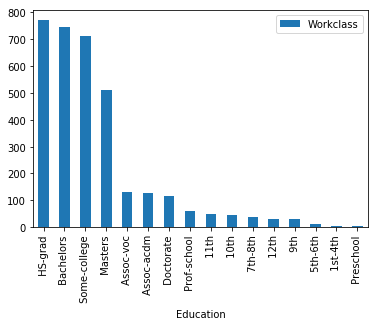

In [57]:

edu_govt = train[(train.Workclass == ' State-gov')| \
                 (train.Workclass == ' Fedral-gov')| \
                 (train.Workclass == ' Local-gov')].pivot_table(index='Education',
                                                    values='Workclass',
                                                    aggfunc='count').sort_values(by='Workclass', 
                                                    ascending=False)
print(edu_govt)
edu_govt.plot(kind='bar')

### Report: HS-Grad education has more # in Governament workclass

In [72]:
nofH_inc_edu = train[train.Income == " >50K"].pivot_table(index=['Workclass', 'Hours/Week'],
                                                        
                                                        values='Income',
                                                        aggfunc='count').sort_values(by='Income',ascending=False)
print(nofH_inc_edu)

                              Income
Workclass         Hours/Week        
 Private          40            2129
                  50             833
                  45             498
                  60             362
 Local-gov        40             311
 Federal-gov      40             252
 Private          55             217
 Self-emp-not-inc 40             180
 State-gov        40             159
 Self-emp-inc     40             146
                  50             143
 Self-emp-not-inc 50             135
 Private          48             111
 Self-emp-inc     60             109
 Self-emp-not-inc 60              93
 Private          35              88
 ?                40              70
 Local-gov        50              68
 Private          44              62
                  65              61
 Self-emp-not-inc 45              59
 Private          42              50
 State-gov        50              47
 Local-gov        45              46
 Self-emp-inc     45              44
 